# Example of optimizing a convex function

# Goal is to test the objective values found by Mango
- Search space size: Uniform
- Number of iterations to try: 40
- domain size: 5000 
- Initial Random: 5

# Benchmarking test with different iterations for serial executions

In [33]:
from mango.tuner import Tuner
from scipy.stats import uniform
import math

def get_param_dict():
    param_dict = {
        'a': uniform(-2, 4),
        'b': uniform(-2, 4)
    }
    return param_dict

def get_objective(x,y):
        x2 = math.pow(x,2)
        x4 = math.pow(x,4)
        y2 = math.pow(y,2)
        return ((4.0 - 2.1 * x2 + (x4 / 3.0)) * x2 + x*y + (-4.0 + 4.0 * y2) * y2)


    
def objfunc(args_list):
    results = []
    for hyper_par in args_list:
        a = hyper_par['a']
        b = hyper_par['b']
        
        result = -1.0*get_objective(a,b)
        results.append(result)
    return results

def get_conf():
    conf = dict()
    conf['batch_size'] = 1
    conf['num_iteration'] = 100
    conf['optimizer'] = "Random"
    return conf

def get_optimal_x():
    param_dict = get_param_dict()
    conf = get_conf()
    tuner = Tuner(param_dict, objfunc,conf)
    results = tuner.maximize()
    return results

In [44]:
Store_Optimal_X = []
Store_Results = []
num_of_tries = 200

In [45]:
for i in range(num_of_tries):
    results = get_optimal_x()
    Store_Results.append(results)
    print(i,":",results['best_objective'])

0 : 1.0160788404270462
1 : 0.8090611464046034
2 : 0.8720949972789556
3 : 1.0314059111682716
4 : 0.8703606654639531
5 : 0.9206542425969664
6 : 0.8280555627881393
7 : 0.9513889939831537
8 : 0.9666094914534663
9 : 0.9918221539434282
10 : 0.8562159123589496
11 : 0.8612495448996942
12 : 0.9165845326549658
13 : 0.8414530457496485
14 : 1.0029251075422299
15 : 1.029865726131212
16 : 1.020487836526001
17 : 0.9224170761560905
18 : 0.8761688008075912
19 : 0.887195205665126
20 : 0.9094478136828683
21 : 0.7246392008599439
22 : 1.023472384882479
23 : 0.8701429417465365
24 : 0.9661573281611671
25 : 0.9792196444653183
26 : 0.21268264205913223
27 : 0.854416456712381
28 : 0.9157951135317427
29 : 0.8901553958882978
30 : 0.9644380082209383
31 : 0.9830969819379173
32 : 0.8438129971360518
33 : 0.9613749721400258
34 : 0.9879441889951373
35 : 0.8691167829546855
36 : 0.8874032393864433
37 : 0.9833168876344129
38 : 1.0242788131107872
39 : 0.8257634845922519
40 : 0.8938285115674326
41 : 0.939779587163801
42 : 0.

In [13]:
#results['best_objective']

In [88]:
#len(Store_Results[0]['objective_values'])

In [89]:
#Store_Results[0]['objective_values'][:15]

In [90]:
#len(Store_Results[0]['params_tried'])

# Extract from the results returned the true optimal values for each iteration

In [46]:
import numpy as np

total_experiments =200

initial_random = 0

plotting_itr =[10, 20,30,40,50,60,70,80,90,100]

plotting_list = []

for exp in range(total_experiments): #for all exp
    local_list = []
    for itr in plotting_itr: # for all points to plot
        # find the value of optimal parameters in itr+ initial_random
        max_value = np.array(Store_Results[exp]['objective_values'][:itr+initial_random]).max()
        local_list.append(max_value)
    plotting_list.append(local_list)

In [47]:
plotting_array = np.array(plotting_list)

In [48]:
plotting_array.shape

(200, 10)

In [49]:
#plotting_array

In [50]:
Y = []
#count range between -1 and 1 and show it
for i in range(len(plotting_itr)):
    y_value = plotting_array[:,i].mean()
    Y.append(y_value)

In [51]:
Y

[0.1553783776302589,
 0.48704185115971926,
 0.6207976430203805,
 0.7307124078791386,
 0.7758538571628398,
 0.812800521783022,
 0.8414774276254022,
 0.85722684004176,
 0.8703548752976193,
 0.885542410391353]

In [52]:
plotting_itr =[10, 20,30,40,50,60,70,80,90,100]

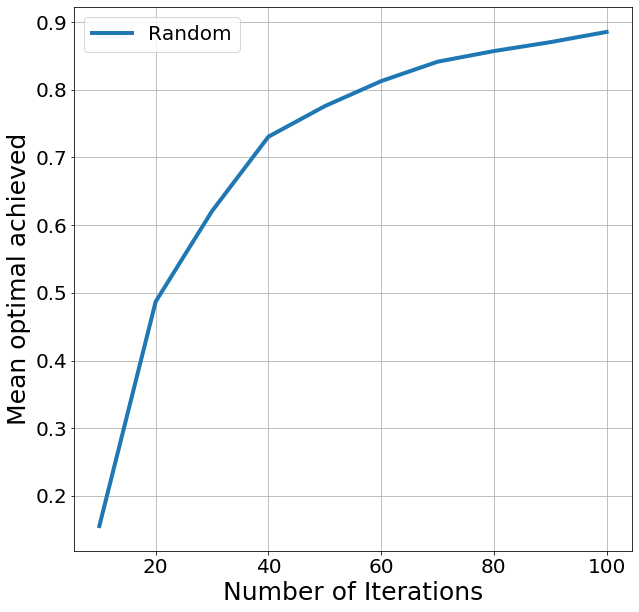

In [53]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))


plt.plot(plotting_itr,Y,label = 'Random',linewidth=4.0) #x, y


plt.xlabel('Number of Iterations',fontsize=25)
plt.ylabel('Mean optimal achieved',fontsize=25)
#plt.title('Variation of Optimal Value of X with iterations',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.yticks(np.arange(10, 110, step=10))
#plt.xticks(np.arange(10, 110, step=10))
plt.grid(True)
plt.legend(fontsize=20)
plt.show()